In [3]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")
#from plotnine import *
import tweepy
import time
from matplotlib import pyplot as plt
import matplotlib

In [11]:
df = pd.read_csv('C:\\Users\\hs324\\OneDrive\\Desktop\\Class_Files\\06_2022Fall\\04_Practicum\\Quantilope_Core\\data\\brands_w_m3gender_region_nov10.csv')

In [12]:
count1 = df.groupby('brand').size().reset_index().rename({0 : 'Count'}, axis = 1).sort_values('Count', ascending = False)
count1['Perc'] = count1['Count'] / count1['Count'].sum()
count1

,brand,Count,Perc
5,Nike,8451,0.519646
0,Adidas,2483,0.152678
11,Vans,1470,0.090389
2,Converse,992,0.060997
6,Puma,780,0.047962
9,Toms,738,0.045379
4,New Balance,714,0.043903
7,Reebok,265,0.016295
10,Under Armour,183,0.011253
1,Allbirds,80,0.004919


In [13]:
# top 5
top5_1 = count1[:5]
#others
new_row = pd.DataFrame(data = {
    'brand' : ['others'],
    'Count' : [count1['Count'][5:].sum()]
})

#combining top 5 with others
top5_1 = pd.concat([top5_1, new_row])

In [14]:
top5_1

,brand,Count,Perc
5,Nike,8451,0.519646
0,Adidas,2483,0.152678
11,Vans,1470,0.090389
2,Converse,992,0.060997
6,Puma,780,0.047962
0,others,2087,NaN


In [15]:
# Major sneaker brands
df2 = df[df['brand'].isin(['Nike', 'New Balance','Converse', 'Adidas', 'Reebok'])]
print(df.shape)
print(df2.shape)

(16263, 21)
(12905, 21)


In [18]:
count2 = df2.groupby('brand').size().reset_index().rename({0 : 'Count'}, axis = 1).sort_values('Count', ascending = False)
count2['Perc'] = count2['Count'] / count2['Count'].sum()
count2

,brand,Count,Perc
3,Nike,8451,0.654862
0,Adidas,2483,0.192406
1,Converse,992,0.076869
2,New Balance,714,0.055327
4,Reebok,265,0.020535


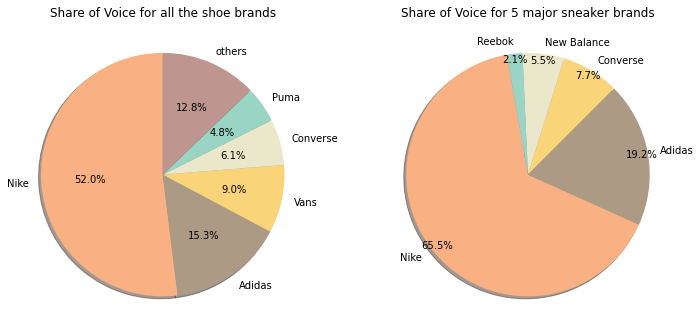

In [19]:
color_set = ('#F9B183', '#AD9A85', '#F9D479',  '#EBE7CB', '#99D4C5', '#BF9590')
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,6))
top5_1.plot(kind = 'pie', y = 'Count', labels = top5_1['brand'], ax = axes[0], legend=None, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = color_set)
count2.plot(kind = 'pie', y = 'Count', labels = count2['brand'], ax = axes[1], legend=None, autopct='%1.1f%%', pctdistance=0.95, 
        shadow=True, startangle=100, colors = color_set)
axes[0].set_title('Share of Voice for all the shoe brands')
axes[1].set_title('Share of Voice for 5 major sneaker brands')
axes[0].set_ylabel('')
axes[1].set_ylabel('')
plt.show()